In [1]:
import cv2
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
import os
import matplotlib.pyplot as plt
import random
import shutil
import numpy as np

In [2]:
from tensorflow.keras.applications import InceptionV3

In [5]:
inception = InceptionV3(weights = "imagenet", include_top = False, input_shape = (224,224,3))

In [6]:
for layer in inception.layers[:]:
    layer.trainable = False

for layer in inception.layers[:]:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000156BA7C2BB0> False
<keras.layers.convolutional.Conv2D object at 0x00000156BA7406A0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000156B0A6CF70> False
<keras.layers.core.activation.Activation object at 0x00000156BF6447C0> False
<keras.layers.convolutional.Conv2D object at 0x00000156BF64E5E0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000156BF644520> False
<keras.layers.core.activation.Activation object at 0x00000156BF601A60> False
<keras.layers.convolutional.Conv2D object at 0x00000156BF6054F0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000156BF64E820> False
<keras.layers.core.activation.Activation object at 0x00000156BEAD6190> False
<keras.layers.pooling.MaxPooling2D object at 0x00000156BEAEF850> False
<keras.layers.convolutional.Conv2D object at 0x00000156BF5ECA90> False
<keras.layers.normalization.batc

In [7]:
model = Sequential()

# inserting the conv layers on top of the base classification layer
model.add(inception)  

# creating the classification layers
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu', use_bias = True))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 48,018,209
Trainable params: 26,215,425
Non-trainable params: 21,802,784
_________________________________________________________________


In [9]:
Dataset = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\covid_direc"

In [10]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                                                    #width_shift_range = 0.2,
                                                                    #brightness_range = [0.2,1],
                                                                    #horizontal_flip = True,
                                                                    #zoom_range = 0.2,
                                                                    validation_split=0.2)

train_data = train_datagen.flow_from_directory(Dataset,
                                                                            subset = 'training',
                                                                            class_mode = 'binary',
                                                                            target_size = (224, 224) 
                                                                            )

validation_data =  train_datagen.flow_from_directory(Dataset,
                                                                                     subset = 'validation',
                                                                                     class_mode = 'binary',
                                                                                     target_size = (224, 224)
                                                                                     )

Found 5779 images belonging to 2 classes.
Found 1444 images belonging to 2 classes.


In [11]:
history = model.fit(train_data, validation_data = validation_data, epochs = 20, batch_size = 32, steps_per_epoch = 10)

Epoch 1/20
10/10 [==============================] - 59s 6s/step - loss: 26.4587 - accuracy: 0.5500 - val_loss: 2.0999 - val_accuracy: 0.7950
Epoch 2/20
10/10 [==============================] - 50s 5s/step - loss: 5.4880 - accuracy: 0.7156 - val_loss: 2.5688 - val_accuracy: 0.8276
Epoch 3/20
10/10 [==============================] - 50s 5s/step - loss: 3.2985 - accuracy: 0.8031 - val_loss: 3.5869 - val_accuracy: 0.8186
Epoch 4/20
10/10 [==============================] - 54s 6s/step - loss: 3.0042 - accuracy: 0.8219 - val_loss: 1.9777 - val_accuracy: 0.8476
Epoch 5/20
10/10 [==============================] - 55s 6s/step - loss: 1.3606 - accuracy: 0.8469 - val_loss: 1.3819 - val_accuracy: 0.8608
Epoch 6/20
10/10 [==============================] - 54s 6s/step - loss: 0.9332 - accuracy: 0.8906 - val_loss: 1.0999 - val_accuracy: 0.8670
Epoch 7/20
10/10 [==============================] - 53s 6s/step - loss: 0.8921 - accuracy: 0.8781 - val_loss: 0.9481 - val_accuracy: 0.8629
Epoch 8/20
10/10 [=

In [13]:
def read_img(img_path):
    image = cv2.imread(img_path)
    resized_image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
    return resized_image

test_image1 = read_img(r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing\COVID-12.png")
print(f"Shape of the image: {test_image1.shape}")
test_image1 = test_image1[np.newaxis,:,:,:]
model.predict(test_image1)

Shape of the image: (224, 224, 3)


array([[0.]], dtype=float32)

In [14]:
Test_Dir = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing"
Testing_Images = os.listdir(Test_Dir)
Predictions = []
for i in Testing_Images:
    direc = os.path.join(Test_Dir, i)
    test_image = read_img(direc)
    test_image = test_image[np.newaxis,:,:,:]
    Predictions.append(model.predict(test_image))
    
preds = np.array(Predictions)
(preds)

array([[[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]]], dtype=float32)

In [15]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
print('Notebook running: keras ', tensorflow.keras.__version__)
np.random.seed(222)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Notebook running: keras  2.7.0


In [16]:
def readImage(Image_Path):
    image = cv2.imread(Image_Path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = skimage.transform.resize(image, (224 ,224)) 
    return image

def draw_Img(img, title = "Image"):
    plt.imshow(img)
    plt.axis('off')
    plt.style.use('seaborn')
    plt.title(title+str(img.shape))
    skimage.io.imshow(Image) 
    plt.show()

def Generate_Superpixels(Image, pixel_dist):
    superpixels = skimage.segmentation.quickshift(Image, kernel_size = 3, max_dist = pixel_dist, ratio = 0.2)
    num_superpixels = np.unique(superpixels).shape[0]
    print(f"Number of Super pixels generated: {num_superpixels}")
    return num_superpixels, superpixels

def Generate_Perturbations(num_perturbations):
    perturbations = np.random.binomial(1, 0.5, size=(num_perturbations, num_superpixels))
    # each row represnt each perturbation 
    # each column represent the super pixels
    print(f"Changes in the superpixels in each perturbations are: {len(perturbations[0])}")
    print(f"Number of perturbations: {len(perturbations)}")
    return perturbations

def perturb_Image(img, perturbation, segments):
    active_pixels = np.where(perturbation == 1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
        mask[segments == active] = 1 
    perturbed_image = copy.deepcopy(img)
    perturbed_image = perturbed_image*mask[:,:,np.newaxis]
    return perturbed_image

def Compute_Distances(num_superpixels, perturbations):
    original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
    distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
    distances.shape
    return distances


def Compute_weights(distances, kernel_width):
    weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
    return weights

def fit_weights(perturbations, predictions, weights):
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions[:,:,0], sample_weight=weights)
    coeff = simpler_model.coef_[0]
    return coeff

def mask_image(Image, num_superpixels, super_pixels, num_top_features, coeff):
    top_features = np.argsort(coeff)[-num_top_features:] 
    mask = np.zeros(num_superpixels) 
    mask[top_features]= True #Activate top superpixels
    skimage.io.imshow(perturb_Image(Image,mask,super_pixels))

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

In [17]:
Image_Path =  r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing\COVID-12.png"
Image = readImage(Image_Path)

Number of Super pixels generated: 55


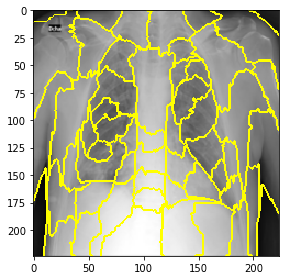

In [18]:
# draw_Img(Image)
num_superpixels , super_pixels = Generate_Superpixels(Image, 200)
skimage.io.imshow(skimage.segmentation.mark_boundaries(Image, super_pixels))

Changes in the superpixels in each perturbations are: 55
Number of perturbations: 150


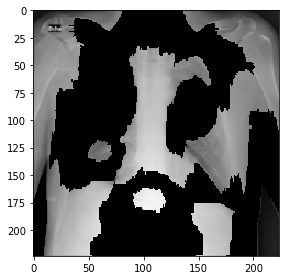

In [19]:
perturbations = Generate_Perturbations(150)
skimage.io.imshow(perturb_Image(Image, perturbations[0],super_pixels))

In [20]:
Perturbated_Df = pd.DataFrame(perturbations.flatten())
Perturbated_Df.shape
predictions = []

In [21]:
for pert in perturbations:
    perturbed_img = perturb_Image(Image,pert,super_pixels)
    pred = model.predict(perturbed_img[np.newaxis,:,:,:])
    predictions.append(pred)

In [22]:
predictions = np.array(predictions)

In [23]:
distances = Compute_Distances(num_superpixels, perturbations)

weights = Compute_weights(distances, 0.25)

In [24]:
coeffs = fit_weights(perturbations, predictions, weights)

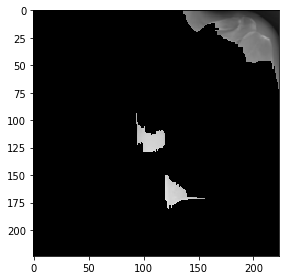

In [25]:
mask_image(Image, num_superpixels, super_pixels, 5, coeffs)